In [54]:
import pandas as pd
import numpy as np

In [55]:
df=pd.read_csv('/content/train.csv')

In [56]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df.shape

(42000, 785)

In [58]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1561,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df.isna().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [60]:
df.dropna(how='any', inplace=True)

In [61]:
df.isna().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [62]:
import matplotlib.pyplot as plt

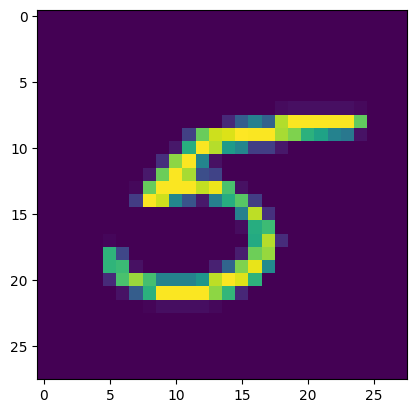

In [63]:
plt.imshow(df.iloc[1045, 1:].values.reshape(28,28))

In [64]:
x=df.drop('label', axis=1)
y=df['label']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=5)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn=KNeighborsClassifier()

In [69]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [70]:
y_pred=knn.predict(x_test)

import time
start=time.time()
print(time.time() - start)

6.866455078125e-05


In [71]:
from sklearn.metrics import accuracy_score

acc= accuracy_score(y_test, y_pred)
acc

0.9658095238095238

 **Now we will try using PCA and see how our model performs on Transformed data**

In [72]:
#first we will standardise our data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

PCA will decompose original features into lower dimension...

in n_components we have have 100 value which will reduce our 784 features into 100 features only

In [73]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [74]:
x_train.shape

(31500, 784)

In [81]:
knn2=KNeighborsClassifier()

In [82]:
knn2.fit(x_train_trf, y_train)

KNeighborsClassifier()

In [83]:
ypred=knn2.predict(x_test_trf)

In [85]:
ac=accuracy_score(y_test, ypred)
ac

0.9516190476190476

In [ ]:
for i in range(1,785,20):
  pca=PCA(n_components=i)
  xtrain=pca.fit_transform(x_train)
  xtest=pca.transform(x_test)
  kn=KNeighborsClassifier()
  kn.fit(xtrain, y_train)
  pred=kn.predict(xtest)
  print(f'Accuracy Score with {i} PCA is {accuracy_score(y_test, pred)}')


Accuracy Score with 1 PCA is 0.25847619047619047
Accuracy Score with 21 PCA is 0.9408571428571428
Accuracy Score with 41 PCA is 0.9519047619047619
Accuracy Score with 61 PCA is 0.9521904761904761
Accuracy Score with 81 PCA is 0.9524761904761905
Accuracy Score with 101 PCA is 0.9514285714285714
Accuracy Score with 121 PCA is 0.9505714285714286
Accuracy Score with 141 PCA is 0.9500952380952381
Accuracy Score with 161 PCA is 0.9506666666666667
Accuracy Score with 181 PCA is 0.9503809523809523
Accuracy Score with 201 PCA is 0.9492380952380952
Accuracy Score with 221 PCA is 0.9474285714285714
Accuracy Score with 241 PCA is 0.9458095238095238
Accuracy Score with 261 PCA is 0.9458095238095238
Accuracy Score with 281 PCA is 0.9432380952380952
Accuracy Score with 301 PCA is 0.9434285714285714
Accuracy Score with 321 PCA is 0.9432380952380952
Accuracy Score with 341 PCA is 0.9412380952380952
Accuracy Score with 361 PCA is 0.9411428571428572
Accuracy Score with 381 PCA is 0.9404761904761905
Accur

In [90]:
pca1=PCA(n_components=2)
x_tr=pca1.fit_transform(x_train)
x_te=pca1.transform(x_test)

In [91]:
x_tr

array([[ -5.17239424,   4.19814539],
       [ -1.94014215,  -6.79485987],
       [ -1.66175601,   2.53313075],
       ...,
       [  2.04811179,   2.49900342],
       [ -3.15774281,  -2.79165092],
       [  7.28071408, -12.78181396]])

In [92]:
import plotly.express as px
y_tr=y_train.astype(str)
fig=px.scatter(x=x_tr[:, 0], y=x_tr[:,1], color=y_tr)
fig.show()


In [93]:
pca2=PCA(n_components=3)
x_tr_trf=pca2.fit_transform(x_train)
x_t_tr=pca2.transform(x_test)

In [94]:
x_tr_trf

array([[ -5.17239424,   4.19814539,  -6.54159003],
       [ -1.94014215,  -6.79485987,   3.19198003],
       [ -1.66175601,   2.53313075,   2.97011801],
       ...,
       [  2.04811179,   2.49900342,  -3.08643194],
       [ -3.15774281,  -2.79165092,  -9.22087536],
       [  7.28071408, -12.78181396,   4.03890696]])

In [97]:
fig=px.scatter_3d(df, x=x_tr_trf[:,0], y=x_tr_trf[:,1], z=x_tr_trf[:,2], color=y_tr)
fig.show()

In [99]:
pca2.explained_variance_
#Eigen Values

array([40.61428056, 29.04231273, 26.68396056])

In [102]:
pca2.components_
#Eigen Vectors

array([[-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

In [103]:
pca2.components_.shape

(3, 784)

In [104]:
pca2.explained_variance_ratio_

array([0.05785326, 0.0413695 , 0.03801013])

In [106]:
pc=PCA(n_components=None)
x_train_p=pc.fit_transform(x_train)
x_test_p=pc.transform(x_test)


In [107]:
pc.explained_variance_ratio_

array([5.78532638e-02, 4.13695025e-02, 3.80101331e-02, 2.96079371e-02,
       2.56285536e-02, 2.24567608e-02, 1.97241894e-02, 1.78236508e-02,
       1.56406371e-02, 1.44049313e-02, 1.36880735e-02, 1.23640285e-02,
       1.14082831e-02, 1.12779740e-02, 1.06974930e-02, 1.01888294e-02,
       9.58409318e-03, 9.42721655e-03, 9.11753023e-03, 9.00237846e-03,
       8.49432113e-03, 8.21283457e-03, 7.86295772e-03, 7.60020230e-03,
       7.31455463e-03, 7.05602810e-03, 6.97383808e-03, 6.74520090e-03,
       6.39717680e-03, 6.22611390e-03, 6.16057178e-03, 6.03919787e-03,
       5.85562421e-03, 5.78890925e-03, 5.70350846e-03, 5.56526677e-03,
       5.44203156e-03, 5.29453929e-03, 5.09426224e-03, 4.91362100e-03,
       4.89369457e-03, 4.82774443e-03, 4.65382940e-03, 4.61603923e-03,
       4.53820096e-03, 4.51068928e-03, 4.46280832e-03, 4.37558349e-03,
       4.32134941e-03, 4.20618394e-03, 4.18224597e-03, 4.06203951e-03,
       4.04004005e-03, 3.97894354e-03, 3.92731723e-03, 3.79817227e-03,
      

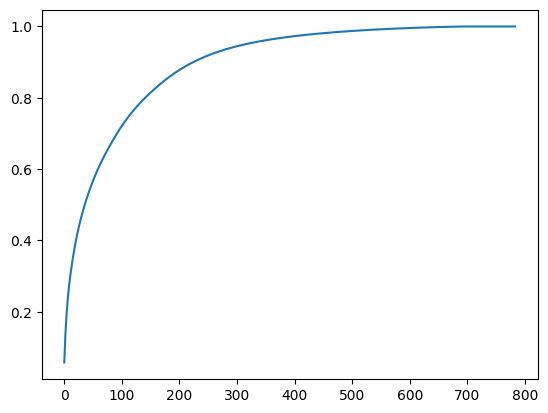

In [108]:
plt.plot(np.cumsum(pc.explained_variance_ratio_))